# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

# Loading Data Set

In [2]:
#using locally stored dataset
#df=pd.read_csv('data/RTA Dataset.csv')

In [3]:
#load the data from the github repo
df=pd.read_csv('https://raw.githubusercontent.com/Teshager21/accident-analysis-addis_ababa/refs/heads/main/data/RTA%20Dataset.csv')

In [4]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


# Exploratory Data Analysis

### <i>Intial Exploration</i>

In [5]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [6]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [7]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
11937,12:29:00,Tuesday,31-50,Male,Junior high school,Employee,2-5yr,Long lorry,Owner,NaN,...,Moving Backward,Driver or rider,Male,18-30,3,NaN,Normal,Not a Pedestrian,No distancing,Serious Injury
6877,8:20:00,Wednesday,18-30,Male,NaN,NaN,NaN,Lorry (11?40Q),Owner,Unknown,...,Going straight,Pedestrian,Female,31-50,3,Self-employed,Normal,Unknown or other,Changing lane to the left,Slight Injury
8583,18:28:00,Saturday,Under 18,Male,Junior high school,Employee,1-2yr,Automobile,Owner,NaN,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
7121,14:34:00,Friday,Over 51,Male,NaN,NaN,NaN,NaN,Owner,Unknown,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
3195,12:30:00,Saturday,18-30,Male,Junior high school,Employee,5-10yr,Other,Organization,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
8518,12:15:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,No priority to pedestrian,Slight Injury
6159,17:30:00,Wednesday,Under 18,Male,Elementary school,Owner,5-10yr,Long lorry,Governmental,Unknown,...,NaN,Driver or rider,Male,31-50,3,Employee,Normal,Not a Pedestrian,Overspeed,Serious Injury
6692,16:30:00,Tuesday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury
2201,14:03:00,Tuesday,31-50,Male,High school,Owner,Above 10yr,Lorry (11?40Q),Owner,NaN,...,Going straight,Passenger,Female,18-30,3,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
1412,9:30:00,Saturday,18-30,Male,NaN,Employee,5-10yr,Other,Owner,2-5yrs,...,Going straight,Driver or rider,Male,31-50,3,NaN,Normal,Not a Pedestrian,Driving carelessly,Slight Injury


In [8]:
df.shape

(12316, 32)

In [9]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [10]:
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}

In [11]:
df.rename(columns=col_map,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [14]:
df.describe(include=['O']).T

,count,unique,top,freq
time,12316,1074,15:30:00,120
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883


<b>Missing Values</b>

In [15]:
df.isna().sum().sort_values(ascending=False)[df.isna().sum()>0]

vehicle_defect             4427
service_year               3928
casualty_work              3198
casualty_fitness           2635
vehicle_type                950
junction_type               887
driving_experience          829
educational_level           741
vehicle_driver_relation     579
vehicle_owner               482
lanes                       385
vehicle_movement            308
accident_area               239
surface_type                172
collision_type              155
road_allignment             142
dtype: int64

In [16]:
missing_percentages=df.isnull().sum().sort_values(ascending=False)*100/len(df)
missing_percentages[missing_percentages>0]

vehicle_defect             35.945112
service_year               31.893472
casualty_work              25.966223
casualty_fitness           21.394933
vehicle_type                7.713543
junction_type               7.202014
driving_experience          6.731082
educational_level           6.016564
vehicle_driver_relation     4.701202
vehicle_owner               3.913608
lanes                       3.126015
vehicle_movement            2.500812
accident_area               1.940565
surface_type                1.396557
collision_type              1.258525
road_allignment             1.152972
dtype: float64

C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_10104\2844332473.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


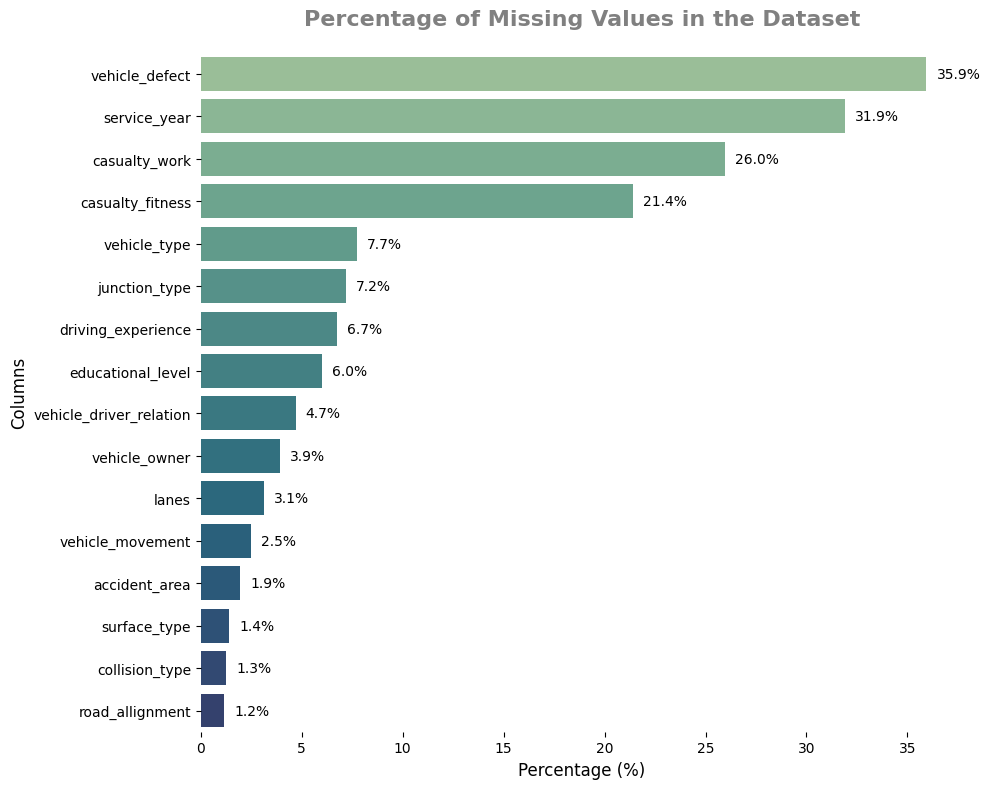

In [17]:
missing_data = missing_percentages[missing_percentages > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    y=missing_data.index,
    x=missing_data.values,
    palette="crest"
)

# Add title and labels
plt.title("Percentage of Missing Values in the Dataset", fontsize=16, fontweight="bold", color="gray", pad=20)
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Columns", fontsize=12)

# Add percentage annotations on bars
for index, value in enumerate(missing_data.values):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', ha='left', fontsize=10, color="black")

# Remove legend (not needed)
plt.legend([], [], frameon=False)

# Improve layout and aesthetics
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

<b>Missingness</b>

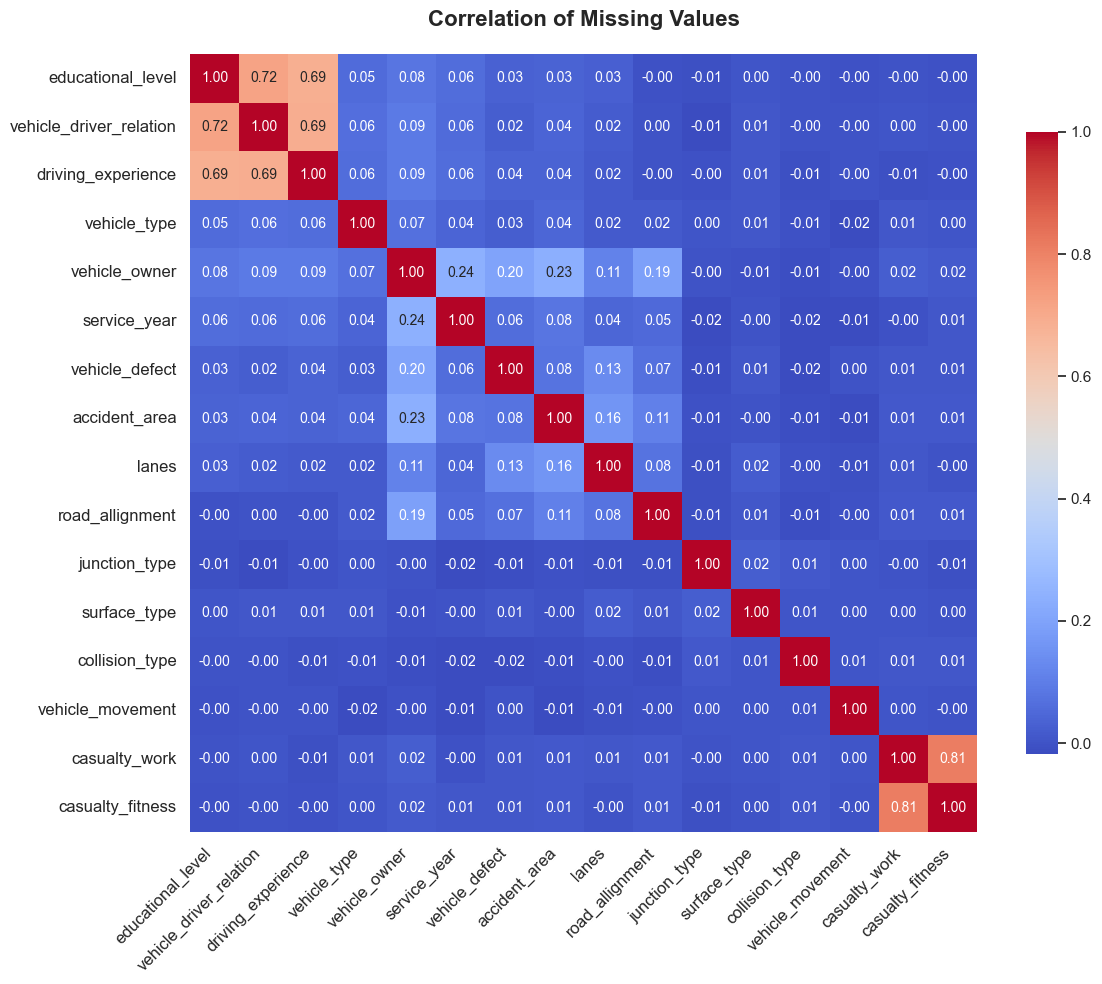

In [18]:
missingness = df.isnull().astype(int)
missingness = missingness.loc[:, (missingness.sum(axis=0) > 0)]
correlation_matrix = missingness.corr()

# Increase plot size and apply Seaborn theme
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 10},
    cbar_kws={"shrink": 0.8}
)

# Add title and adjust axis labels
plt.title("Correlation of Missing Values", fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
df2=df.copy()

In [20]:
#missing in numerical data
df.select_dtypes(exclude=['O']).isna().sum()

vehicles_involved    0
casualties           0
dtype: int64

**Encoding**

In [21]:
#segreggate nominal and ordinal features
nominal_features=['day_of_week', 'driver_sex',
       'vehicle_driver_relation', 'vehicle_type',
       'vehicle_owner', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_fitness',
       'casualty_work', 'pedestrian_movement',
       'accident_cause']
ordinal_features=['driver_age', 'educational_level', 'driving_experience', 'service_year', 'casualty_age', 'accident_severity']
len(nominal_features)+len(ordinal_features)

28

In [22]:
#inspect ordinal feature values
# df['casualties'].unique()
for col in ordinal_features:
    print(col ," : ",df[col].unique())

driver_age  :  ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
educational_level  :  ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
driving_experience  :  ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
service_year  :  ['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'Below 1yr']
casualty_age  :  ['na' '31-50' '18-30' 'Under 18' 'Over 51' '5']
accident_severity  :  ['Slight Injury' 'Serious Injury' 'Fatal injury']


In [23]:
#where casualty_age is equal to 5
df2[df2['casualty_age']==5]['casualty_age'].count()

np.int64(0)

In [24]:
#Nominal Encoding

lencoders={}
for col in nominal_features:
    label_encoder = LabelEncoder()
    non_nan_mask = df2[col].notna()  # Mask for non-NaN values
    col_name=col + '_en'
    df2.loc[non_nan_mask, col_name] = label_encoder.fit_transform(df2.loc[non_nan_mask, col])
    lencoders[col]=label_encoder
    df2[col_name] = df2[col_name].fillna(np.nan)
    df2.drop(columns=[col],inplace=True)
len(df2.columns)

32

In [25]:
#Ordinal Encoding
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
columns_to_encode = ordinal_features
for col in columns_to_encode:
    df2[col] = df2[col].fillna('missing')
for col in columns_to_encode:
    df2[col] = encoder.fit_transform(df2[[col]])
for col in columns_to_encode:
    missing_encoded_value = encoder.transform([['missing']])[0][0]
    df2[col] = df2[col].replace(missing_encoded_value, np.nan)

df2.head()

c:\Users\Meymuna - ANE\Documents\code\dataviz\accident-analysis-addisababa\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
c:\Users\Meymuna - ANE\Documents\code\dataviz\accident-analysis-addisababa\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
c:\Users\Meymuna - ANE\Documents\code\dataviz\accident-analysis-addisababa\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
c:\Users\Meymuna - ANE\Documents\code\dataviz\accident-analysis-addisababa\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
c:\Users\Meymuna - ANE\Documents\code\dataviz\accident-analy

,time,driver_age,educational_level,driving_experience,service_year,vehicles_involved,casualties,casualty_age,casualty_severity,accident_severity,...,light_condition_en,weather_condition_en,collision_type_en,vehicle_movement_en,casualty_class_en,casualty_sex_en,casualty_fitness_en,casualty_work_en,pedestrian_movement_en,accident_cause_en
0,17:02:00,0.0,0.0,0.0,3.0,2,2,5.0,na,2.0,...,3.0,2.0,3.0,2.0,3.0,2.0,NaN,NaN,5.0,9.0
1,17:02:00,1.0,4.0,3.0,2.0,2,2,5.0,na,2.0,...,3.0,2.0,8.0,2.0,3.0,2.0,NaN,NaN,5.0,16.0
2,17:02:00,0.0,4.0,0.0,6.0,2,2,1.0,3,1.0,...,3.0,2.0,2.0,2.0,0.0,1.0,NaN,0.0,5.0,0.0
3,1:06:00,0.0,4.0,2.0,6.0,2,2,0.0,3,2.0,...,0.0,2.0,8.0,2.0,2.0,0.0,2.0,0.0,5.0,1.0
4,1:06:00,0.0,4.0,1.0,2.0,2,2,5.0,na,2.0,...,0.0,2.0,8.0,2.0,3.0,2.0,NaN,NaN,5.0,16.0


<b>Converting values to numbers</b>

In [26]:
#time
df2['time']=pd.to_datetime(df2['time'],format='%H:%M:%S')
df2['hour']=df2['time'].dt.hour
df2['minute']=df2['time'].dt.minute
df2[['time','hour','minute']].head()

#convert objects to numbers
df2['casualty_severity']=pd.to_numeric(df2['casualty_severity'],errors='coerce')

#drop the time feature
df2.drop(columns=['time'],inplace=True)
df2.dtypes

driver_age                    float64
educational_level             float64
driving_experience            float64
service_year                  float64
vehicles_involved               int64
casualties                      int64
casualty_age                  float64
casualty_severity             float64
accident_severity             float64
day_of_week_en                float64
driver_sex_en                 float64
vehicle_driver_relation_en    float64
vehicle_type_en               float64
vehicle_owner_en              float64
vehicle_defect_en             float64
accident_area_en              float64
lanes_en                      float64
road_allignment_en            float64
junction_type_en              float64
surface_type_en               float64
road_surface_conditions_en    float64
light_condition_en            float64
weather_condition_en          float64
collision_type_en             float64
vehicle_movement_en           float64
casualty_class_en             float64
casualty_sex

In [27]:
df2['educational_level'].unique()

array([0., 4., 7., 1., 2., 5., 3., 6.])

### Impute Missing Values

In [28]:
cols_withna=[col for col in df2 if df2[col].isna().sum()>0]
cols_withna

['casualty_severity',
 'vehicle_driver_relation_en',
 'vehicle_type_en',
 'vehicle_owner_en',
 'vehicle_defect_en',
 'accident_area_en',
 'lanes_en',
 'road_allignment_en',
 'junction_type_en',
 'surface_type_en',
 'collision_type_en',
 'vehicle_movement_en',
 'casualty_fitness_en',
 'casualty_work_en']

In [29]:
# train=df2[]
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
imputer = IterativeImputer(estimator=rf, random_state=0)
imputed_data = imputer.fit_transform(df2)
imputed_df = pd.DataFrame(imputed_data, columns=df2.columns)
imputed_df.head()


,driver_age,educational_level,driving_experience,service_year,vehicles_involved,casualties,casualty_age,casualty_severity,accident_severity,day_of_week_en,...,collision_type_en,vehicle_movement_en,casualty_class_en,casualty_sex_en,casualty_fitness_en,casualty_work_en,pedestrian_movement_en,accident_cause_en,hour,minute
0,0.0,0.0,0.0,3.0,2.0,2.0,5.0,3.0,2.0,1.0,...,3.0,2.0,3.0,2.0,2.0,0.0,5.0,9.0,17.0,2.0
1,1.0,4.0,3.0,2.0,2.0,2.0,5.0,3.0,2.0,1.0,...,8.0,2.0,3.0,2.0,2.0,0.0,5.0,16.0,17.0,2.0
2,0.0,4.0,0.0,6.0,2.0,2.0,1.0,3.0,1.0,1.0,...,2.0,2.0,0.0,1.0,2.0,0.0,5.0,0.0,17.0,2.0
3,0.0,4.0,2.0,6.0,2.0,2.0,0.0,3.0,2.0,3.0,...,8.0,2.0,2.0,0.0,2.0,0.0,5.0,1.0,1.0,6.0
4,0.0,4.0,1.0,2.0,2.0,2.0,5.0,3.0,2.0,3.0,...,8.0,2.0,3.0,2.0,2.0,0.0,5.0,16.0,1.0,6.0


In [47]:
new_nominal_feature_names=[col+'_en' for col in nominal_features]
for col in new_nominal_feature_names:
    new_col_name=col[:-3]
    df2.rename(columns={col:new_col_name},inplace=True)
    # imputed_df.rename(columns={col,col[:-3]},inplace=True)
for col in new_nominal_feature_names:
    new_col_name=col[:-3]
    imputed_df.rename(columns={col:new_col_name},inplace=True)
imputed_df

,driver_age,educational_level,driving_experience,service_year,vehicles_involved,casualties,casualty_age,casualty_severity,accident_severity,day_of_week,...,collision_type,vehicle_movement,casualty_class,casualty_sex,casualty_fitness,casualty_work,pedestrian_movement,accident_cause,hour,minute
0,0.0,0.0,0.0,3.0,2.0,2.0,5.0,3.0,2.0,1.0,...,3.0,2.0,3.0,2.0,2.0,0.0,5.0,9.0,17.0,2.0
1,1.0,4.0,3.0,2.0,2.0,2.0,5.0,3.0,2.0,1.0,...,8.0,2.0,3.0,2.0,2.0,0.0,5.0,16.0,17.0,2.0
2,0.0,4.0,0.0,6.0,2.0,2.0,1.0,3.0,1.0,1.0,...,2.0,2.0,0.0,1.0,2.0,0.0,5.0,0.0,17.0,2.0
3,0.0,4.0,2.0,6.0,2.0,2.0,0.0,3.0,2.0,3.0,...,8.0,2.0,2.0,0.0,2.0,0.0,5.0,1.0,1.0,6.0
4,0.0,4.0,1.0,2.0,2.0,2.0,5.0,3.0,2.0,3.0,...,8.0,2.0,3.0,2.0,2.0,0.0,5.0,16.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1.0,7.0,1.0,6.0,2.0,1.0,5.0,3.0,2.0,6.0,...,8.0,2.0,3.0,2.0,2.0,0.0,5.0,10.0,16.0,15.0
12312,4.0,1.0,2.0,6.0,2.0,1.0,5.0,3.0,2.0,3.0,...,8.0,4.0,3.0,2.0,2.0,0.0,5.0,10.0,18.0,0.0
12313,2.0,4.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,...,8.0,4.0,0.0,1.0,2.0,0.0,5.0,1.0,13.0,55.0
12314,0.0,4.0,3.0,1.0,2.0,1.0,5.0,3.0,2.0,3.0,...,8.0,4.0,3.0,2.0,2.0,0.0,5.0,5.0,13.0,55.0


In [ ]:
#decoding
for col, encoder in lencoders.items():
    imputed_df[col] = encoder.inverse_transform(imputed_df[col].astype(int))
imputed_df.sample(10)

ValueError: invalid literal for int() with base 10: 'Monday'

<b>Duplicated Values</b>

In [ ]:
print(df.duplicated().sum())

0


<b>#Unique Values per Columns</b>

In [ ]:
df.nunique().sort_values(ascending=False)

time                       1074
accident_cause               20
vehicle_type                 17
accident_area                14
vehicle_movement             13
collision_type               10
weather_condition             9
road_allignment               9
pedestrian_movement           9
junction_type                 8
casualties                    8
casualty_work                 7
lanes                         7
driving_experience            7
educational_level             7
day_of_week                   7
casualty_age                  6
vehicles_involved             6
service_year                  6
casualty_fitness              5
surface_type                  5
driver_age                    5
vehicle_driver_relation       4
vehicle_owner                 4
casualty_class                4
casualty_severity             4
light_condition               4
road_surface_conditions       4
vehicle_defect                3
driver_sex                    3
casualty_sex                  3
accident

<b>Distinct Values</b>

In [ ]:
uniques=[]
for i in df.columns:
     uniques.append(df[i].unique())
uniques_df=pd.Series(data=uniques,index=df.columns)
uniques_df

time                       [17:02:00, 1:06:00, 14:15:00, 17:30:00, 17:20:...
day_of_week                [Monday, Sunday, Friday, Wednesday, Saturday, ...
driver_age                        [18-30, 31-50, Under 18, Over 51, Unknown]
driver_sex                                           [Male, Female, Unknown]
educational_level          [Above high school, Junior high school, nan, E...
vehicle_driver_relation               [Employee, Unknown, Owner, nan, Other]
driving_experience         [1-2yr, Above 10yr, 5-10yr, 2-5yr, nan, No Lic...
vehicle_type               [Automobile, Public (> 45 seats), Lorry (41?10...
vehicle_owner                [Owner, Governmental, nan, Organization, Other]
service_year               [Above 10yr, 5-10yrs, nan, 1-2yr, 2-5yrs, Unkn...
vehicle_defect                                        [No defect, nan, 7, 5]
accident_area              [Residential areas, Office areas,   Recreation...
lanes                      [nan, Undivided Two way, other, Double carriag...

array([[<Axes: title={'center': 'vehicles_involved'}>,
        <Axes: title={'center': 'casualties'}>]], dtype=object)

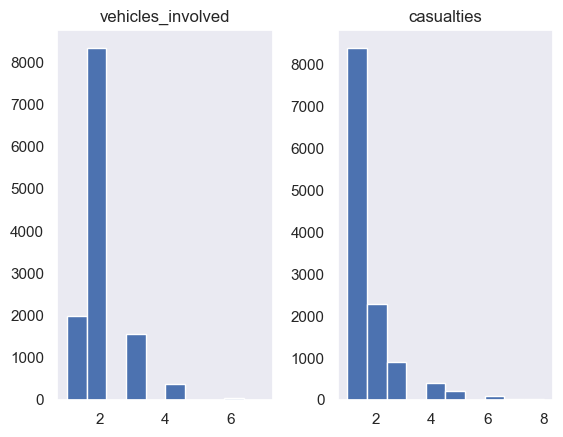

In [ ]:
df.hist(grid=False)
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

<b>Skewness</b>

In [ ]:
count_valu= df['accident_severity'].value_counts()
print(count_valu)

accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64


In [ ]:
proportions = count_valu / count_valu.sum()
print(proportions)


accident_severity
Slight Injury     0.845648
Serious Injury    0.141523
Fatal injury      0.012829
Name: count, dtype: float64


In [ ]:
cv = np.std(proportions) / np.mean(proportions)
print(f"Coefficient of Variation: {cv}")

Coefficient of Variation: 1.09815368128082


<Axes: title={'center': 'Category Proportions'}, xlabel='accident_severity'>

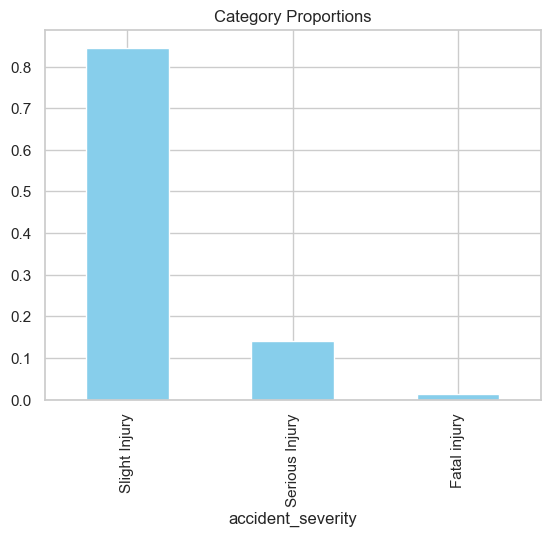

In [ ]:
proportions.plot(kind='bar', color='skyblue', title='Category Proportions')

C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_9104\1214894584.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(count_valu)


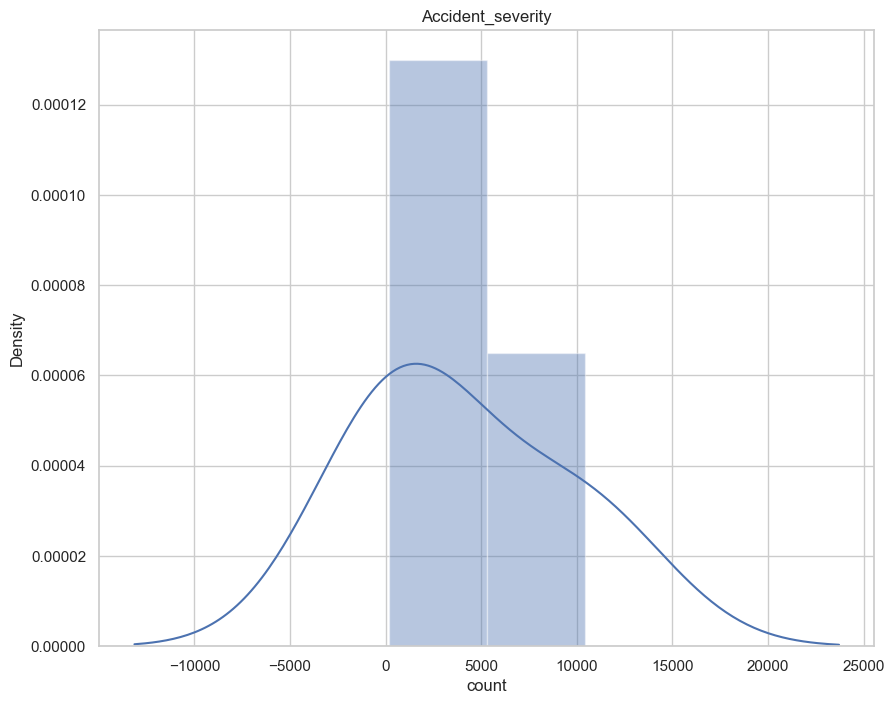

In [ ]:
plt.figure(figsize= (10,8))
sns.distplot(count_valu)
plt.title("Accident_severity")
plt.show()

### <i>Univariate Analysis</i>

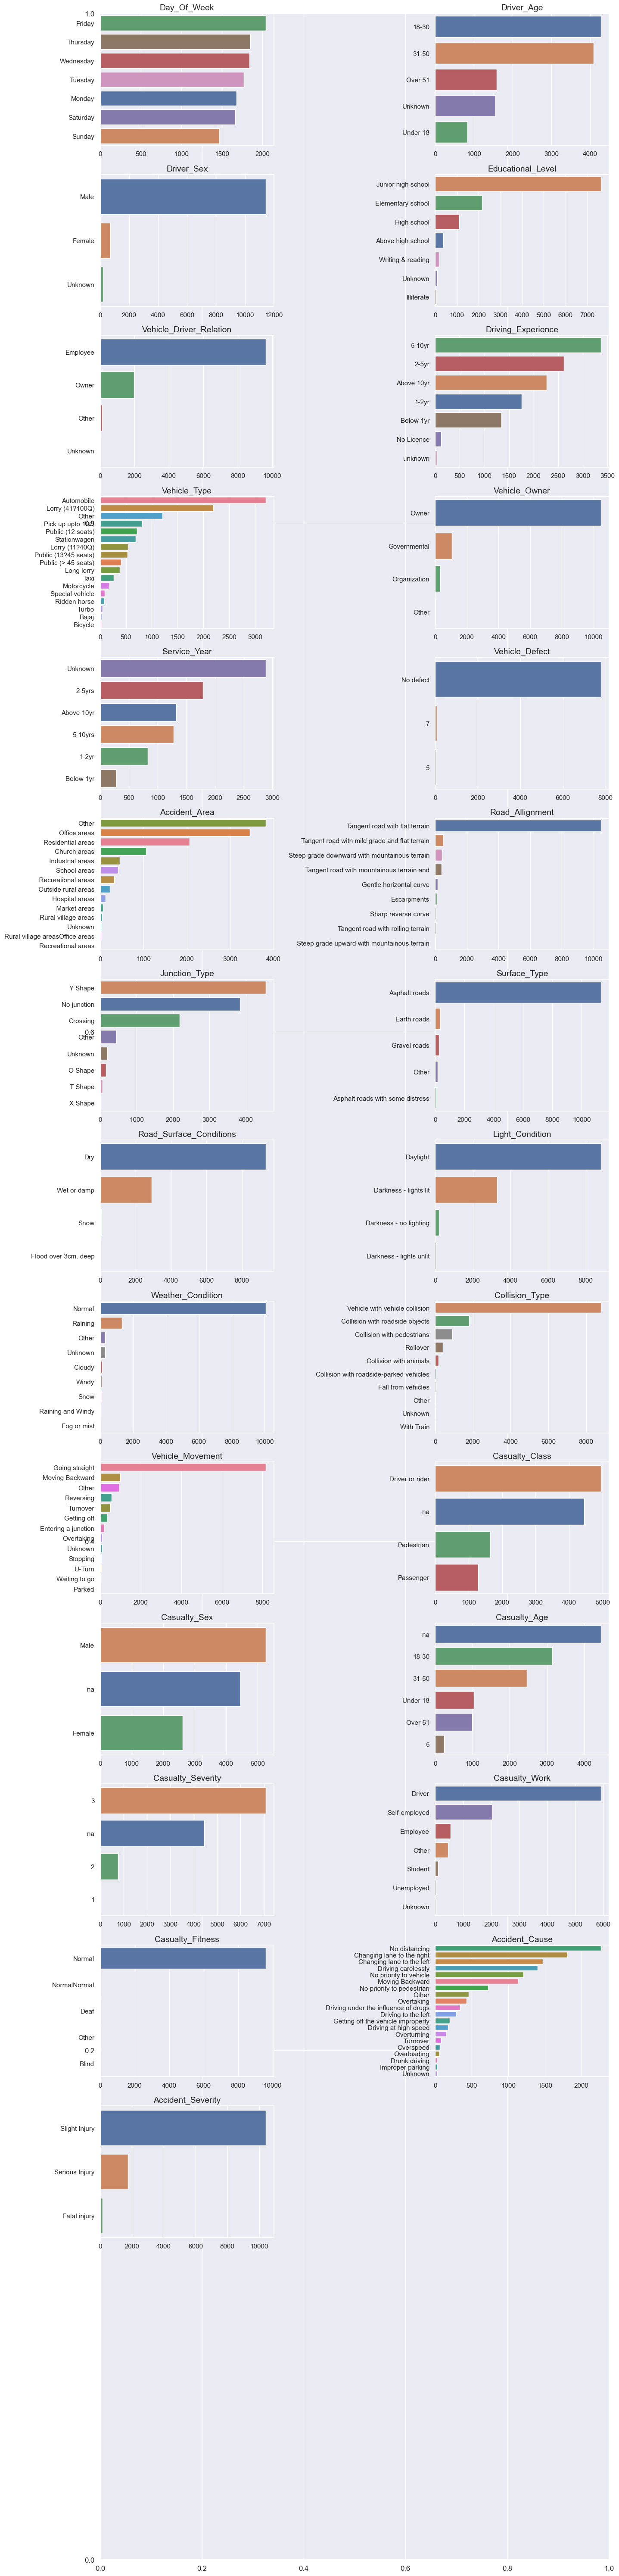

In [ ]:
plt.figure(figsize=(15,60))
sns.set_style("darkgrid")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plotnumber=1
for col in df.drop(['pedestrian_movement','lanes','time','casualties','vehicles_involved'],axis=1):
    ax1 = plt.subplot(16,2,plotnumber)
    if plotnumber <= df.shape[1]:
        order=df[col].value_counts().index.tolist()
        sns.countplot(data=df,y=col,hue=col,legend=False,order=order)
        plt.xlabel('')
        plt.ylabel('')
        plt.title(col.title(),fontsize=14)
    plotnumber+=1
plt.tight_layout()

<i>Accident distribution through out the week days<i>

C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_9104\3799638487.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x=df['day_of_week'],hue=df['casualty_severity'],order=cat_order,legend=False,ax=axes[1],color='skyblue')


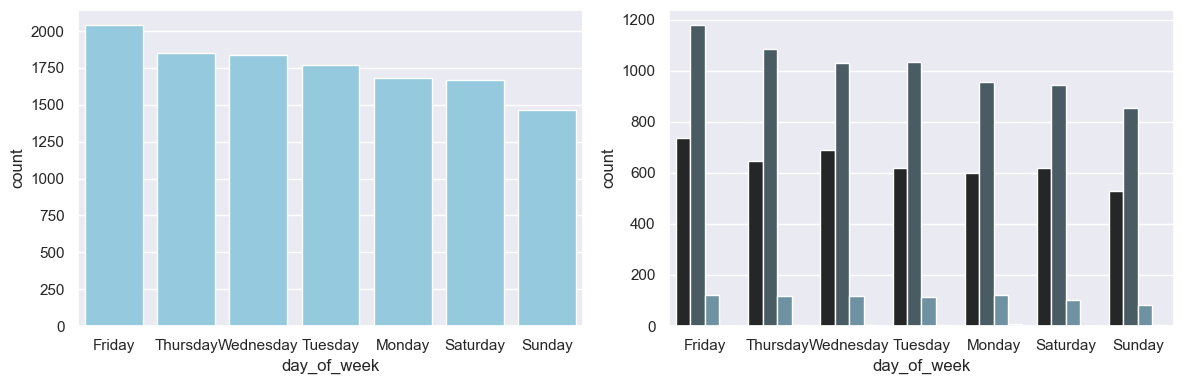

In [ ]:
#Weekdays and accidents
date_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
# plt.annotate()
cat_order=df['day_of_week'].value_counts().index
sns.countplot(data=df,x='day_of_week',ax=axes[0],order=cat_order,color='skyblue')
# plt.gca().invert_yaxis()
sns.countplot(x=df['day_of_week'],hue=df['casualty_severity'],order=cat_order,legend=False,ax=axes[1],color='skyblue')
plt.tight_layout()


C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_9104\1311010231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, y='hour',palette = 'Dark2',order=order,gap=0)


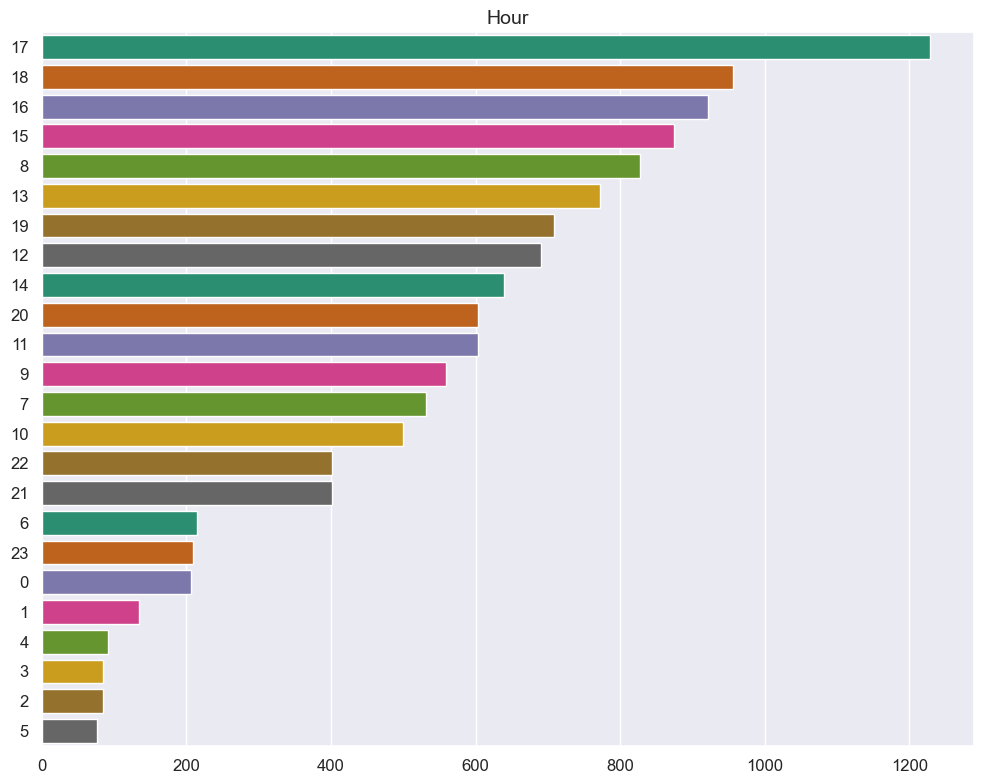

In [ ]:
plt.figure(figsize=(10,8))
order=df2['hour'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df2, y='hour',palette = 'Dark2',order=order,gap=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_9104\2916528416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_weekend, y='accident_area', palette = 'Dark2',order=order)


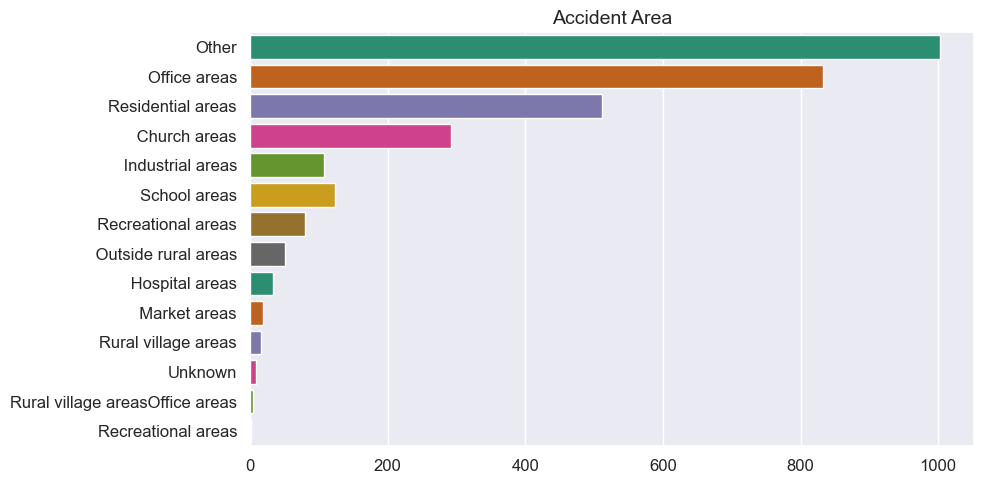

In [ ]:
plt.figure(figsize=(10,5))
df_weekend=df[df['day_of_week'].isin(['Saturday','Sunday'])]
order=df['accident_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df_weekend, y='accident_area', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Accident Area', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### Accident Area

C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_9104\143074294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='accident_area', palette = 'Dark2',order=order)


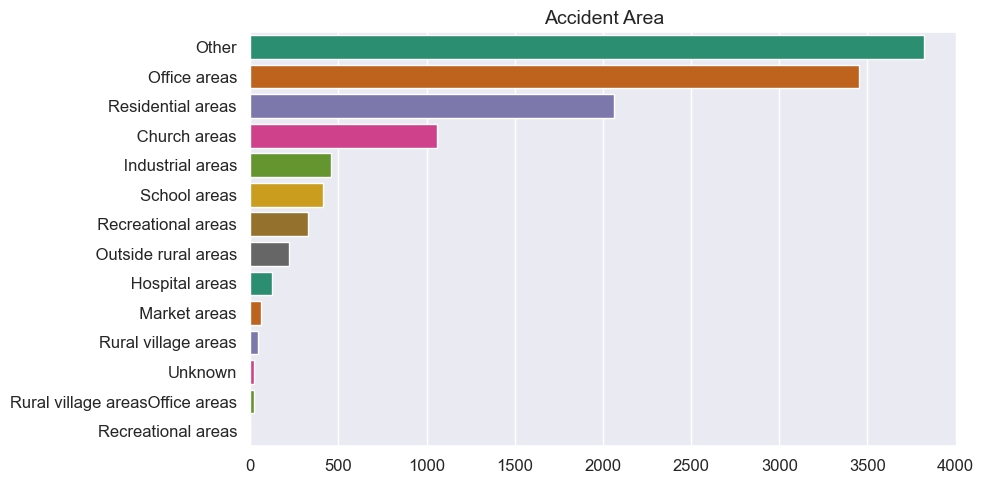

In [ ]:
plt.figure(figsize=(10,5))
order=df['accident_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='accident_area', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Accident Area', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_9104\3669694929.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_weekend, y='accident_area', palette = 'Dark2',order=order)


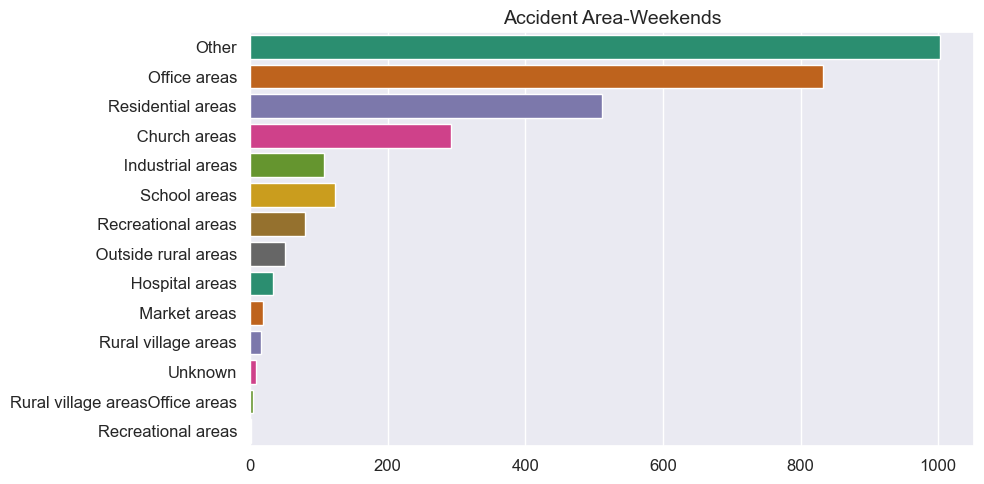

In [ ]:
plt.figure(figsize=(10,5))

order=df['accident_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df_weekend, y='accident_area', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Accident Area-Weekends', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_9104\721704253.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='lanes', palette = 'Dark2',order=order)


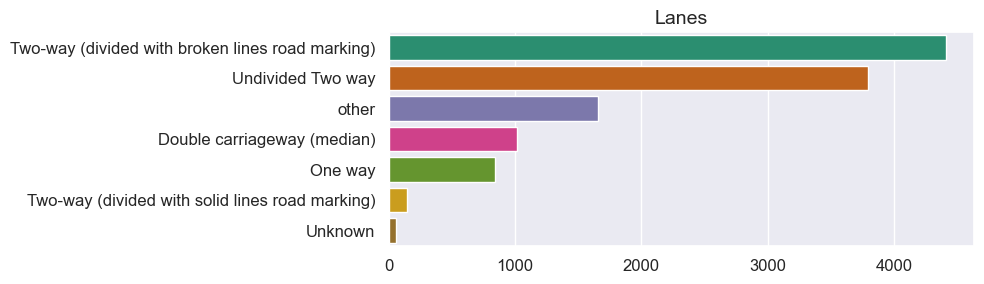

In [ ]:
plt.figure(figsize=(10,3))
order=df['lanes'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='lanes', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

C:\Users\Meymuna - ANE\AppData\Local\Temp\ipykernel_9104\343839610.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='driver_sex', palette = 'Dark2',order=order)


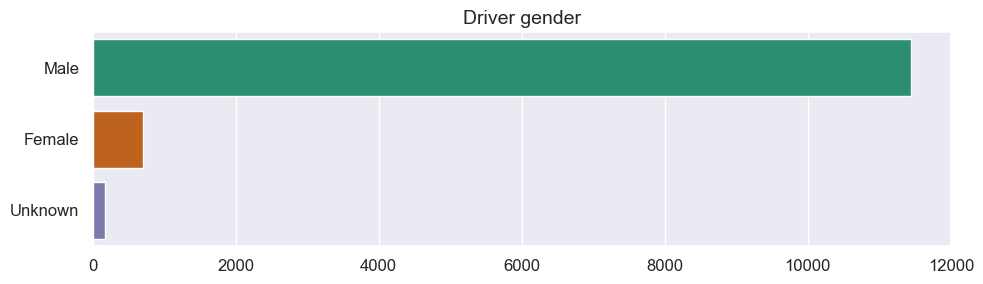

In [ ]:
plt.figure(figsize=(10,3))
order=df['driver_sex'].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y='driver_sex', palette = 'Dark2',order=order)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Driver gender', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

### <i>Bivariate Analysis</i>

### <i>Multivariate Analysis</i>

In [ ]:
imputed_df.corr()

,driver_age,educational_level,driving_experience,service_year,vehicles_involved,casualties,casualty_age,casualty_severity,accident_severity,day_of_week_en,...,collision_type_en,vehicle_movement_en,casualty_class_en,casualty_sex_en,casualty_fitness_en,casualty_work_en,pedestrian_movement_en,accident_cause_en,hour,minute
driver_age,1.000000,0.008246,-0.013481,-0.000672,0.003370,-0.054474,0.000043,-0.001623,0.013185,0.019993,...,0.000496,-0.006562,0.005386,0.011358,-0.005154,-0.002773,0.000372,-0.000703,0.002069,-0.007233
educational_level,0.008246,1.000000,0.286770,0.012000,0.008924,0.003365,0.006307,-0.010825,-0.002380,0.001704,...,-0.004822,0.000524,0.002997,0.007533,0.008071,0.020986,-0.000777,0.001272,0.002198,-0.002990
driving_experience,-0.013481,0.286770,1.000000,0.021784,-0.005868,-0.009971,-0.009816,-0.003819,-0.005094,-0.001673,...,0.015912,-0.001185,-0.002758,0.000195,0.014905,0.019100,-0.016421,-0.002781,-0.002998,0.004080
service_year,-0.000672,0.012000,0.021784,1.000000,0.004521,0.005675,-0.001228,0.006571,0.002215,-0.020002,...,0.022194,-0.015226,-0.002435,0.002124,0.009632,0.003446,-0.004977,-0.009578,-0.008719,-0.003442
vehicles_involved,0.003370,0.008924,-0.005868,0.004521,1.000000,0.213427,0.003051,0.012554,0.096023,-0.002303,...,0.005616,-0.005796,0.006072,0.007118,0.005795,0.006943,0.020466,-0.021512,0.023095,0.019083
casualties,-0.054474,0.003365,-0.009971,0.005675,0.213427,1.000000,-0.008637,0.003476,-0.045339,-0.050042,...,-0.020694,0.002599,-0.012820,-0.004589,0.004956,0.004721,0.006019,-0.022096,0.051761,0.009764
casualty_age,0.000043,0.006307,-0.009816,-0.001228,0.003051,-0.008637,1.000000,0.129971,0.025510,-0.003642,...,0.004962,0.006919,0.802169,0.705230,-0.010301,0.005789,0.062065,0.010536,0.006487,-0.005112
casualty_severity,-0.001623,-0.010825,-0.003819,0.006571,0.012554,0.003476,0.129971,1.000000,-0.010531,0.001064,...,0.003306,0.002683,0.120221,0.157963,0.013152,0.005239,0.078206,0.001536,-0.009321,-0.007696
accident_severity,0.013185,-0.002380,-0.005094,0.002215,0.096023,-0.045339,0.025510,-0.010531,1.000000,-0.002730,...,0.025867,-0.010386,0.014075,0.003708,-0.016218,0.001954,0.013082,0.008040,-0.018065,0.030980
day_of_week_en,0.019993,0.001704,-0.001673,-0.020002,-0.002303,-0.050042,-0.003642,0.001064,-0.002730,1.000000,...,0.003026,-0.027643,0.006661,0.001461,0.004884,-0.005255,0.000250,0.010516,-0.009914,-0.009277


<Axes: >

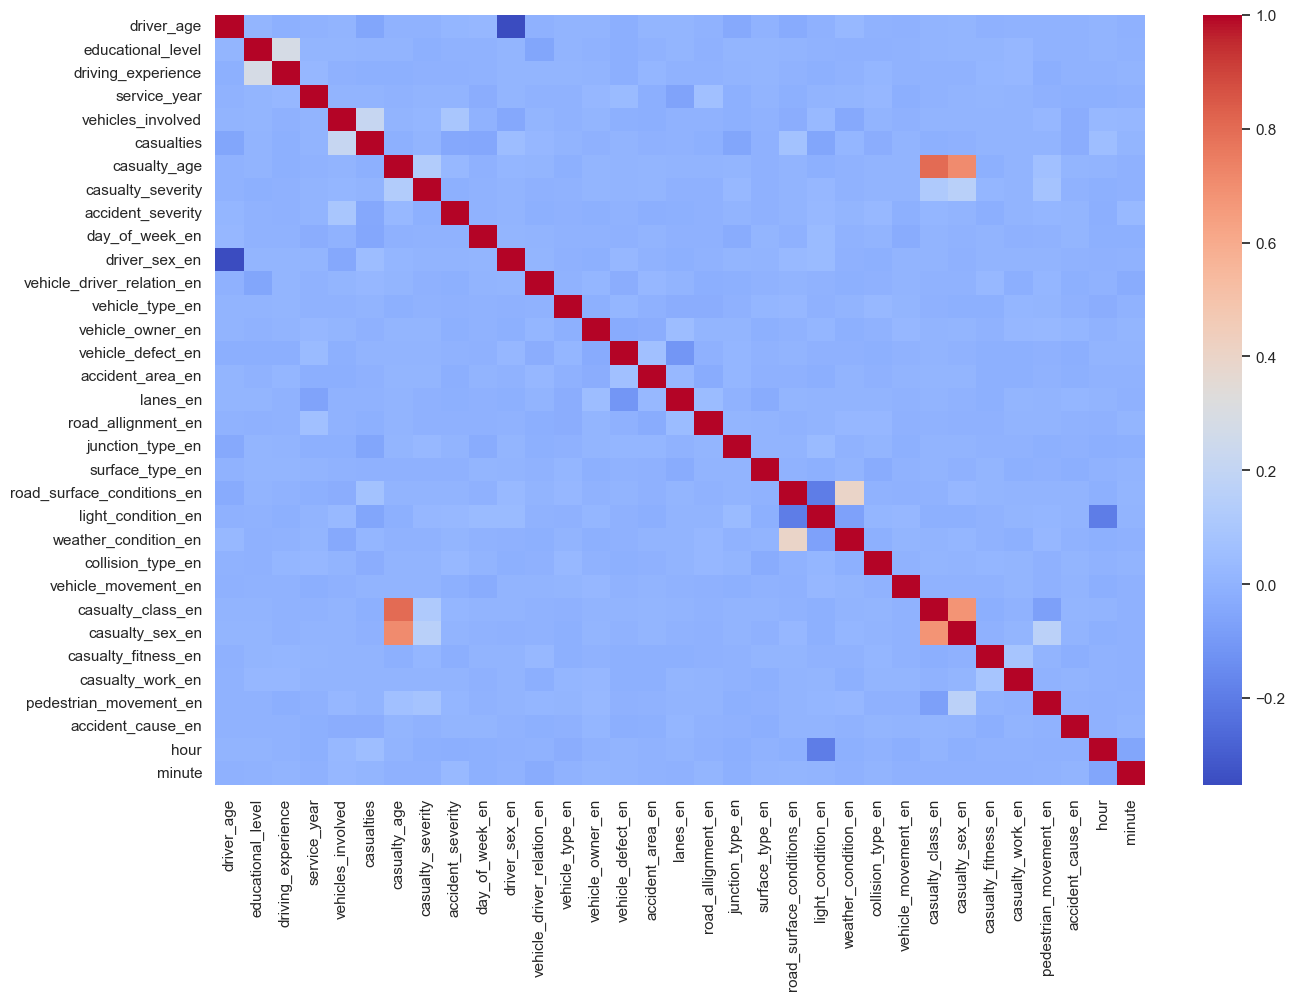

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(imputed_df.corr(),cmap="coolwarm")


# Preprocessing

### <i>Data Cleaning</i>

### <i>Data Integration</i>

### <i>Data Transformation</i>

### <i>Data Reduction</i>

### <i>Data Discretization and Concpet Heirarchy Generation</i>

# Insights and Recommendations